# 機械学習

## 4. 教師なし学習

教師なし学習には2つの代表的な手法があり，どちらもデータの背後にある  
本質的な構造を抽出するのに使用します．

### 主成分分析
1つ目は方法である主成分分析は次元削減の手法であり，可能な限りもとのデータの情報を  
保持したままより低次元に変換します．

In [308]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
from sklearn.datasets import load_iris # アヤメのデータセットをインポート

In [310]:
dataset = load_iris() # アヤメのデータセットを読み込む

以前と同じように入力値と目標値で分けます

In [311]:
x = dataset.data # 説明変数
t = dataset.target # 目的変数 教師なし学習なので使わない

In [312]:
feature_names = dataset.feature_names # 説明変数の名前

In [313]:
pd.DataFrame(x, columns=feature_names) # 説明変数をデータフレームに変換

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


上記で確認できた4次元の情報を2次元に落とし込みます

In [314]:
from sklearn.decomposition import PCA # 主成分分析をインポート

In [315]:
pca = PCA(n_components=2, random_state=0) # 主成分分析のインスタンスを生成 n_componentsは削除後の次元数

今回は教師あり学習とは異なり正解がないため，主成分分析では  
低次元でも元のデータの特徴をとらえた方向を見つける．

In [316]:
pca.fit(x) # 主成分分析の分散共分散行列を計算

PCA(n_components=2, random_state=0)

ここではデータの変換はまだ行われていません．

In [317]:
pca.get_covariance() # 分散共分散行列を表示

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

transformメソッドを使って，xを変形します．つまり次元削減した新しいxを取得します．

In [318]:
x_transformed = pca.transform(x) # 主成分分析を実行

In [319]:
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head() 
# 主成分分析後のデータをデータフレームに変換して次元削減後のデータを確認

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


それぞれの列が保持する元のデータの情報の割合を寄与率(Proportion of variance)と呼びます．  
ここでは寄与率を確認してみましょう．

In [320]:
pca.explained_variance_ratio_[0] # 第一主成分の寄与率を表示

0.924618723201727

In [321]:
pca.explained_variance_ratio_[1] # 第二主成分の寄与率を表示

0.05306648311706785

上記の結果から，合計した97%程の元データの情報を保持したまま次元削減できています．  
このように元データをどの程度再現できているか，確認することが重要です．

In [322]:
np.unique(t) # 目的変数の値を確認

array([0, 1, 2])

<AxesSubplot: >

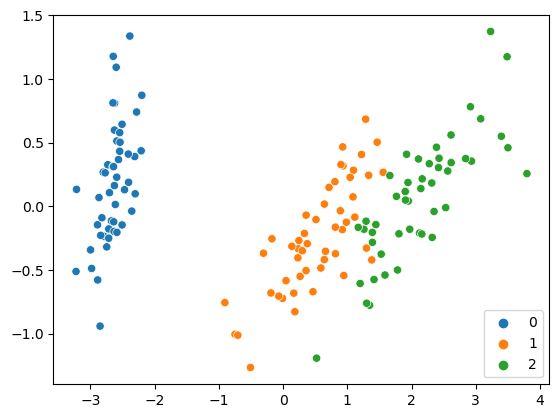

In [323]:
#データの可視化
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3))

実際は主成分分析では必ず変数の標準化が必要です．  
これからその実装を行います．

In [324]:
from sklearn.preprocessing import StandardScaler # 標準化をインポート

In [325]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # 標準化を実行

In [326]:
pca = PCA(n_components=2, random_state=0) # 主成分分析のインスタンスを生成

In [327]:
x_scaled_transformed = pca.fit_transform(x_scaled) # 主成分分析を実行

In [328]:
pd.DataFrame(x_scaled_transformed, columns=['第一主成分', '第二主成分']) 
# 主成分分析後のデータをデータフレームに変換して次元削減後のデータを確認

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [329]:
pca.explained_variance_ratio_[0] # 第一主成分の寄与率を表示

0.7296244541329985

In [330]:
pca.explained_variance_ratio_[1] # 第二主成分の寄与率を表示

0.22850761786701793

<AxesSubplot: >

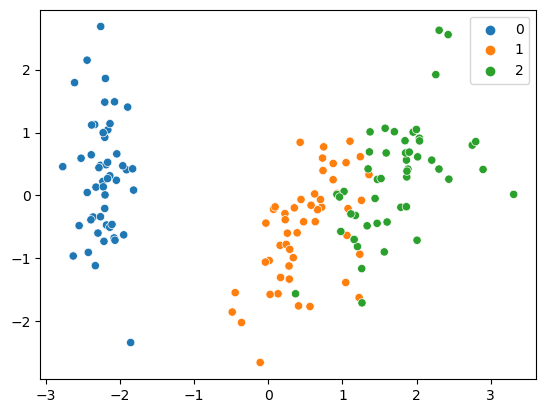

In [331]:
sns.scatterplot(x=x_scaled_transformed[:, 0], y=x_scaled_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3))

### k-平均法  
クラスタリングと呼ばれる手法に当たりデータを複数のクラスター(グループ)に  
分けて大まかな特徴を捉える際に使用します．

In [332]:
df = pd.read_csv("教師なし学習/convinience_store.csv")
df.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570
3,4,22850,4100,10145,0,5467,10145
4,5,22500,0,0,0,0,0


k-平均法によりこの顧客情報からグループわけを行います．

In [333]:
x = df.drop("No", axis=1).values #　顧客IDを削除して説明変数を抽出

In [334]:
x[:3] # 説明変数の中身を確認

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]], dtype=int64)

In [335]:
from sklearn.cluster import KMeans

In [336]:
kmeans = KMeans(n_clusters=3, random_state=0) # クラスタリングのインスタンスを生成 n_clustersはクラスタ数

本来であれば，n_clustersは事前に決まっていたり，試行錯誤の上で決定します

In [ ]:
kmeans.fit(x)

In [338]:
kmeans.cluster_centers_.shape # クラスタの重心の座標を表示

(3, 6)

In [339]:
cluster = kmeans.predict(x) # クラスタリングを実行
cluster # クラスタリングの結果を表示

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

設定した通り3つのクラスに分けているのがわかります．

In [340]:
df_cluster = df.copy() # データフレームをコピー
df_cluster["cluster"] = cluster

In [341]:
df_cluster.head() # クラスタリングの結果をデータフレームに追加

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


データフレームにどこのクラスに属するかまでを追加できました

教師なし学習は明確な答えが存在しないため，その予測結果がどのようなものでどのように活用するかは  
人間側が考慮する必要があります．

以下は先ほどのクラスター結果の考察の一例です．

In [342]:
df_result = pd.DataFrame() # 結果を格納するデータフレームを生成
df_result

""


In [343]:
df_cluster[df_cluster["cluster"] == 0].mean().tolist() # クラスタ0の平均値をリストに変換

[37.806451612903224,
 5043.548387096775,
 3486.4193548387098,
 7017.741935483871,
 2206.0,
 2512.9032258064517,
 3509.1290322580644,
 0.0]

In [344]:
df_result["cluster0"] = df_cluster[df_cluster["cluster"] == 0].mean().tolist() # クラスタ0の平均値をデータフレームに追加
df_result["cluster1"] = df_cluster[df_cluster["cluster"] == 1].mean().tolist() # クラスタ1の平均値をデータフレームに追加
df_result["cluster2"] = df_cluster[df_cluster["cluster"] == 2].mean().tolist() # クラスタ2の平均値をデータフレームに追加

In [345]:
df_result # 結果を表示

,cluster0,cluster1,cluster2
0,37.806452,46.250000,13.533333
1,5043.548387,28681.250000,17266.666667
2,3486.419355,5637.666667,2730.933333
3,7017.741935,1298.750000,10721.666667
4,2206.000000,1271.000000,590.866667
5,2512.903226,1770.875000,3447.333333
6,3509.129032,716.958333,9851.200000
7,0.000000,1.000000,2.000000


In [346]:
df_result = df_result.set_index(df_cluster.columns) # インデックスを元のデータフレームのカラム名に変更
df_result

,cluster0,cluster1,cluster2
No,37.806452,46.250000,13.533333
弁当・麺類,5043.548387,28681.250000,17266.666667
飲料,3486.419355,5637.666667,2730.933333
おにぎり・サンドイッチ,7017.741935,1298.750000,10721.666667
スイーツ,2206.000000,1271.000000,590.866667
カップスープ,2512.903226,1770.875000,3447.333333
サラダ,3509.129032,716.958333,9851.200000
cluster,0.000000,1.000000,2.000000


In [347]:
df_cluster.columns

Index(['No', '弁当・麺類', '飲料', 'おにぎり・サンドイッチ', 'スイーツ', 'カップスープ', 'サラダ', 'cluster'], dtype='object')

In [348]:
df_result = df_result.drop(['No', 'cluster']).T # 転置して不要なカラムを削除

In [349]:
df_result

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster0,5043.548387,3486.419355,7017.741935,2206.000000,2512.903226,3509.129032
cluster1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster2,17266.666667,2730.933333,10721.666667,590.866667,3447.333333,9851.200000


上記のようにクラスタリングした後の，各クラスの特徴を分析できました．